MODULE-1:
IMPORTING LIBRARIES

In [ ]:
#importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as statsmodels
import missingno as msno
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
import math
warnings.simplefilter(action = "ignore")

DATA PRE-PROCESSING

In [ ]:
#loading diabetes dataset file to pandas Dataframe
diabetes_dataset_file = pd.read_csv("/pima diabetes dataset.csv")

In [ ]:
#Calculating the No. of rows and Columns in dataset
diabetes_dataset_file.shape

(768, 9)

In [ ]:
#The first five observation of the dataset are accessed.
diabetes_dataset_file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Getting more info of the dataset
diabetes_dataset_file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#checking whether the dataset contains null values or not:
diabetes_dataset_file.isnull().head(768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
#checking no. of null values our dataset contains:
diabetes_dataset_file.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

In [ ]:
#making a copy of the dataset
diabetes_dataset_file_copy = diabetes_dataset_file.copy(deep = True)
diabetes_dataset_file_copy[['Glucose','BloodPressure','SkinThickness','Insulin',
                            'BMI']] = diabetes_dataset_file_copy[['Glucose','BloodPressure',
                            'SkinThickness','Insulin','BMI']].replace(0,np.NaN)
                            #here we are replacing the zero values with NAN values

#Count of No. of NANs:
print(diabetes_dataset_file_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


MODULE-2:
IMPUTATION OF DATA

In [ ]:
#distribution of Outcome variable:
diabetes_dataset_file['Outcome'].value_counts()*100/len(diabetes_dataset_file)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
#classification of outcome variable:
diabetes_dataset_file.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> NON-DIABETIC

1 -> DIABETIC

In [ ]:
#getting the mean based on the outcome column
diabetes_dataset_file.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


DATA VISUALIZATION

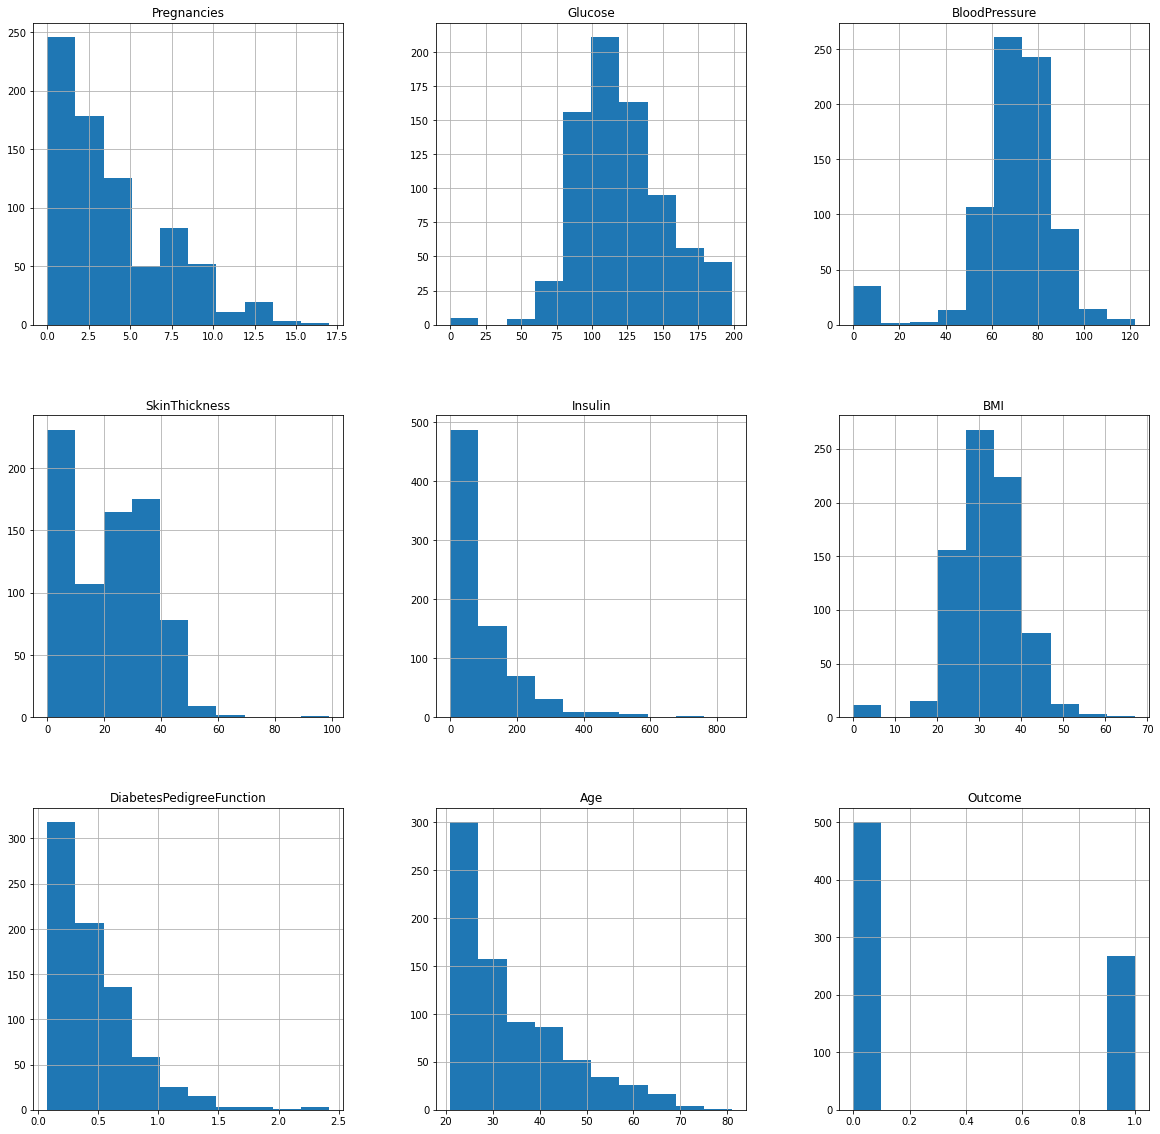

In [ ]:
#Data visualisation of the data pre - imputation
p = diabetes_dataset_file.hist(figsize = (20,20))

In [ ]:
diabetes_dataset_file_copy['Glucose'].fillna(diabetes_dataset_file_copy['Glucose'].mean(), inplace = True)
diabetes_dataset_file_copy['BloodPressure'].fillna(diabetes_dataset_file_copy['BloodPressure'].mean(), inplace = True)
diabetes_dataset_file_copy['SkinThickness'].fillna(diabetes_dataset_file_copy['SkinThickness'].median(), inplace = True)
diabetes_dataset_file_copy['Insulin'].fillna(diabetes_dataset_file_copy['Insulin'].median(), inplace = True)
diabetes_dataset_file_copy['BMI'].fillna(diabetes_dataset_file_copy['BMI'].median(), inplace = True)

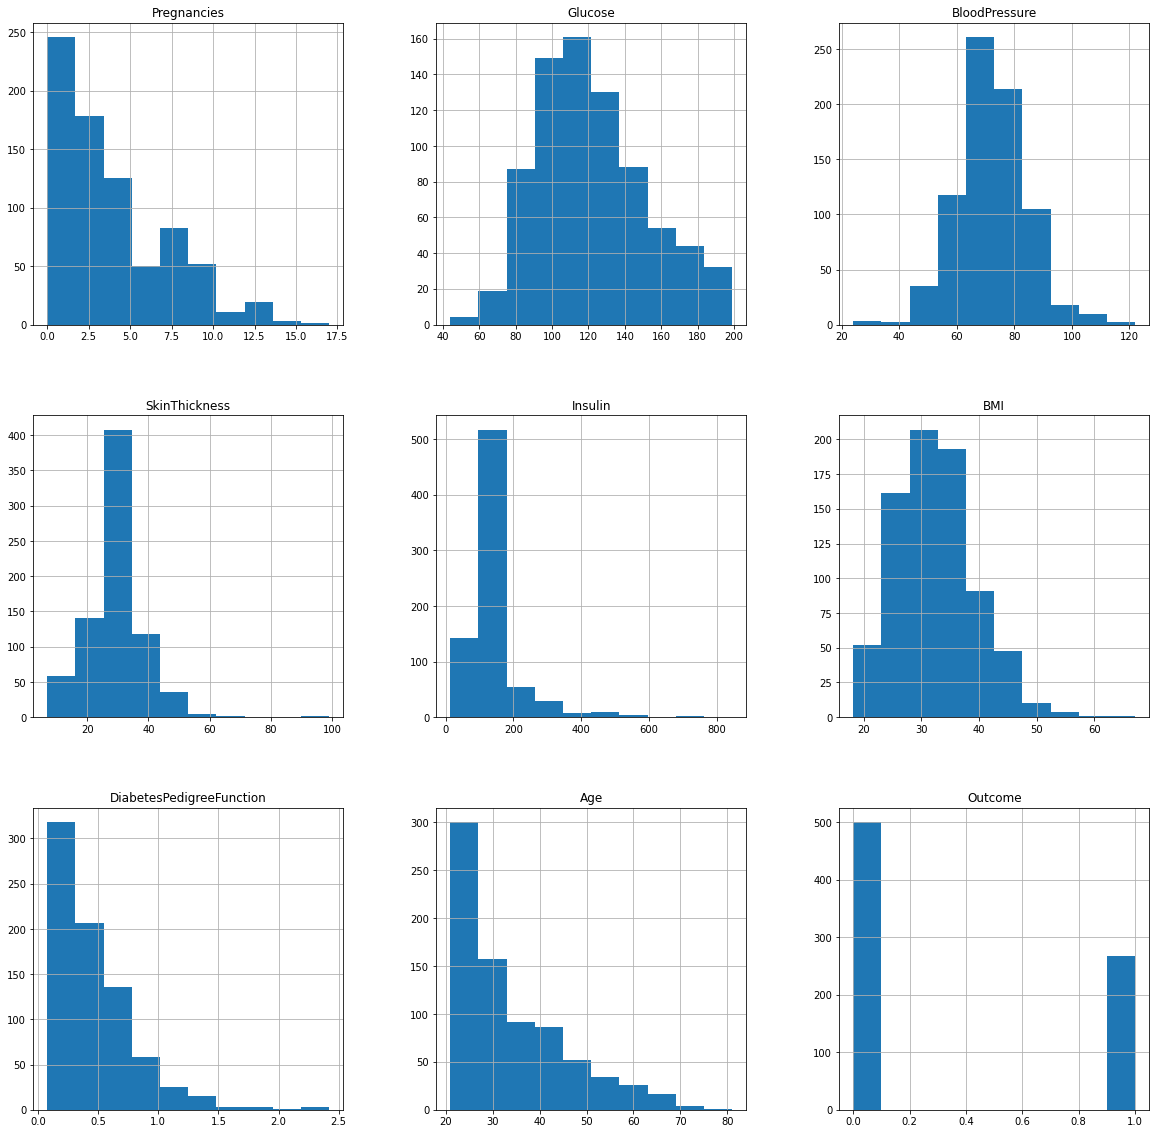

In [ ]:
# Data visualisation of data post - imputation
p = diabetes_dataset_file_copy.hist(figsize = (20,20))

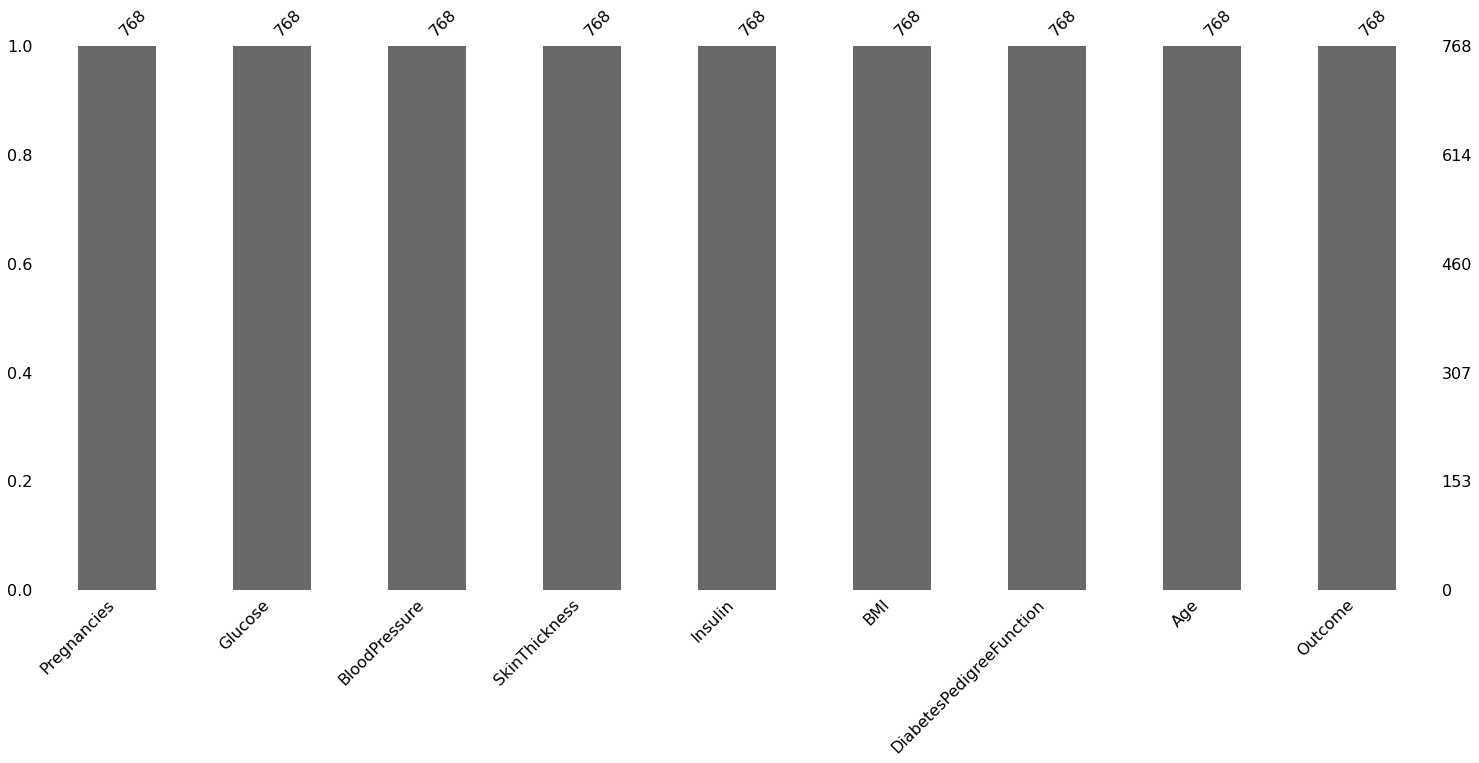

In [ ]:
#plotting null-count analysis plot
p = msno.bar(diabetes_dataset_file)

Here we can see that the bar plot of all the columns remains the same, it means there are no zero values in the dataset.

0    500
1    268
Name: Outcome, dtype: int64


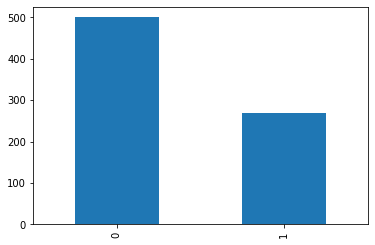

In [ ]:
#Checking if outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_dataset_file["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_dataset_file.Outcome.value_counts())
p=diabetes_dataset_file.Outcome.value_counts().plot(kind="bar")

This outcome set is imbalanced, as the number of diabetic patients is almost half of those that are non - diabetic

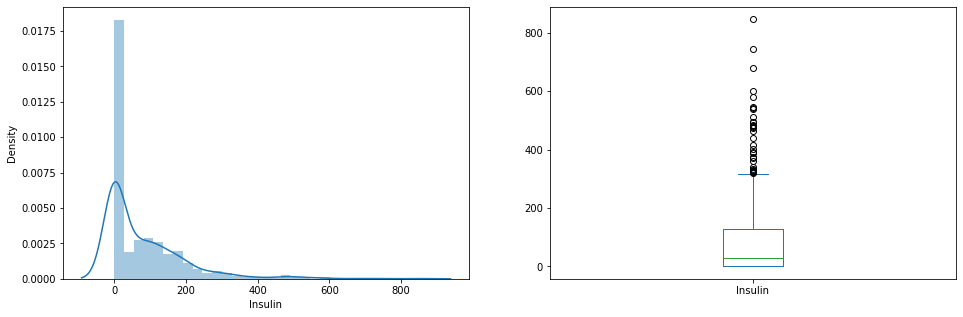

In [ ]:
plt.subplot(121), sns.distplot(diabetes_dataset_file['Insulin'])
plt.subplot(122), diabetes_dataset_file['Insulin'].plot.box(figsize=(16,5))
plt.show()

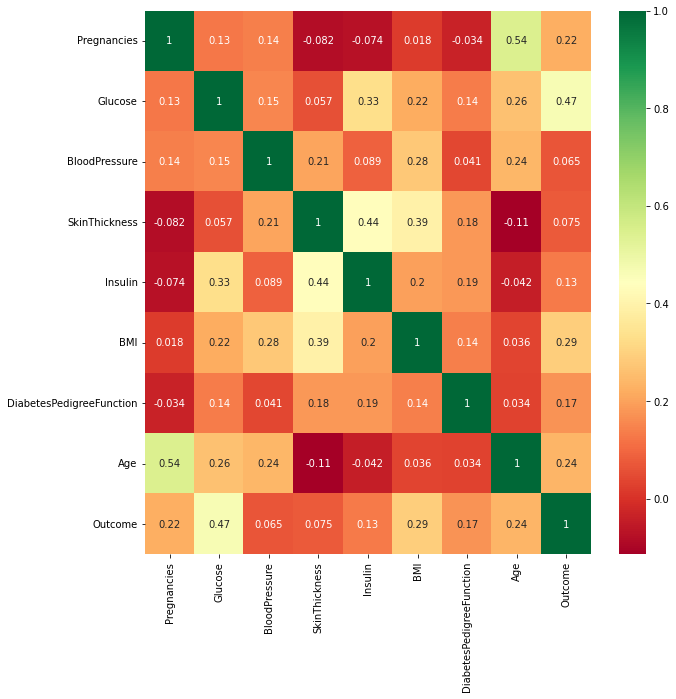

In [ ]:
#Correlation between all the features before cleaning
plt.figure(figsize=(10,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_dataset_file.corr(), annot=True,cmap ='RdYlGn')

DATA STANDARDIZATION

In [ ]:
#Before scaling down the data let’s have a look into it

diabetes_dataset_file_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#After Standard scaling

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_dataset_file_copy.drop(["Outcome"],
axis = 1),), columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness',
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
Y = diabetes_dataset_file_copy.Outcome

In [ ]:
print(X)
print(Y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1      -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2       1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.680125       0.297376       2.150354  0.455573  0.064737   
764    -0.547919  0.010298      -0.198965      -0.239949 -0.181541  0.632365   
765     0.342981 -0.022579      -0.033518      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.141808      -1.026200      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.943143      -0.198965       0.215347 -0.181541 -0.299127   

     DiabetesPedigreeFunction       Age

MODULE-3: TRAINING AND TESTING VARIOUS ML MODELS

Splitting the dataset

In [ ]:
X = diabetes_dataset_file.drop('Outcome', axis=1)
y = diabetes_dataset_file['Outcome']

Splitting the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 7)

Model Building

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
#Checking accuracy of the model

rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

In [ ]:
#Getting accuracy score for Random Forest

from sklearn import metrics

predictions = rfc.predict(X_test)
acc_scr_rf = format(metrics.accuracy_score(y_test, predictions))
print("Accuracy_Score =", acc_scr_rf)

Accuracy_Score = 0.7598425196850394


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[136  26]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       162
           1       0.69      0.62      0.65        92

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



Decision Tree

Building the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

predictions = dtree.predict(X_test)
acc_scr_dt = format(metrics.accuracy_score(y_test,predictions))
print("Accuracy Score =", acc_scr_dt)

Accuracy Score = 0.7047244094488189


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[127  35]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       162
           1       0.60      0.57      0.58        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.70      0.70      0.70       254



**Logistic Regression**

Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[142,  20],
       [ 34,  58]])

In [ ]:
#Getting accuracy score for Random Forest

from sklearn import metrics

predictions = logreg.predict(X_test)
acc_scr_logreg = format(metrics.accuracy_score(y_test, predictions))
print("Accuracy_Score =", acc_scr_logreg)

Accuracy_Score = 0.7874015748031497


K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train,y_train)

In [ ]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 15


In [ ]:
#Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       162
           1       0.71      0.60      0.65        92

    accuracy                           0.76       254
   macro avg       0.75      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254


 F1:
 0.6470588235294118

 Precision score is:
 0.7051282051282052

 Recall score is:
 0.5978260869565217

 Confusion Matrix:



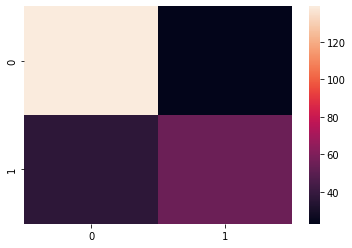

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
from sklearn import metrics

acc_scr_svm = format(metrics.accuracy_score(y_test, svc_pred))
print("Accuracy_Score = ", acc_scr_svm)

Accuracy_Score =  0.7480314960629921


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



Module 4: Hyperparameter Optimization

In [ ]:
params = {
    "learning_rate"       : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"           : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight"    : [1, 3, 5, 7],
    "gamma"               : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree"    : [0.3, 0.4, 0.5, 0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier = xgboost.XGBClassifier()

In [ ]:
classifier.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)

print(cm)
print(score)

[[136  26]
 [ 30  62]]
0.7795275590551181


In [ ]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter = 5, scoring = 'roc_auc',n_jobs=-1, cv=5, verbose=3)

In [ ]:
def timer(start_time = None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time Taken = %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X_train, y_train.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time Taken = 0 hours 0 minutes and 0.8 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.2, max_depth=10, min_child_weight=5)

In [ ]:
classifier = xgboost.XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=6,
              min_child_weight=5)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train.ravel(), cv=10)

In [ ]:
score

array([0.80769231, 0.76923077, 0.80769231, 0.73076923, 0.64705882,
       0.7254902 , 0.88235294, 0.70588235, 0.80392157, 0.66666667])

In [ ]:
score.mean()

0.7546757164404223

**Module 5: Choosing and Saving the most accurate Model: Logistic Regression**

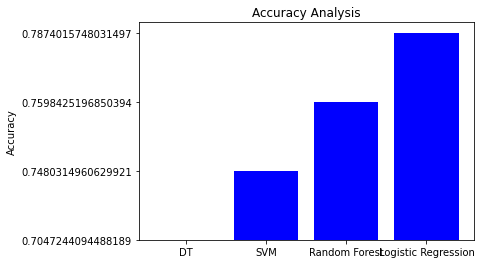

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
languages = ('DT', 'SVM', 'Random Forest', 'Logistic Regression')
y = np.arange(len(languages))
accuracy = [acc_scr_dt, acc_scr_svm, acc_scr_rf, acc_scr_logreg]
plt.bar(y, accuracy, align='center', color='Blue')
plt.xticks(y, languages)
plt.ylabel('Accuracy')
plt.title('Accuracy Analysis')
plt.show();

**The Conclusion from Model Building**

Here, Logistic Regression is the best model for this prediction with an accuracy score of 0.787

**Saving Model : Logistic Regression**

In [ ]:
import pickle

saved_model = pickle.dumps(logreg)

logreg_from_pickle = pickle.loads(saved_model)

logreg_from_pickle.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
diabetes_dataset_file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset_file.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
def Predict(user_input):
  return logreg.predict(user_input)

In [ ]:
print(Predict([[0,137,40,35,168,43.1,2.228,33]])) #4th patient

[1]


In [ ]:
print(Predict([[10,101,76,48,180,32.9,0.171,63]]))  # 763 th patient

[0]


In [ ]:
print(Predict([[5,121,72,23,112,26.2,0.245,30]]))

[0]


In [ ]:
print(Predict([[2,110,80,30,147,27,0.180,20]]))

[0]


In [ ]:
print(Predict([[18,140,85,30,149,27,0.195,30]]))

[1]


In [ ]:
print(Predict([[1,89,66,23,94,28.1,0.167,32]])) #External Input Outcome: 0

[0]


Conclusion

After using all these patients records, we are able to build machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualisation.